## Mutual information

**The mutual information** measures the **reduction in uncertainty** in variable A when variable B is known. **Higher mutual information** values, indicate **little uncertainty** about the target Y given the predictor X.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

## Classification

In [40]:
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [41]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Start with the training set to avoid overfit!**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Determine Mutual Information

**Mutual information** between the **variables** and the **target**. **The smaller the value of the mi, the less information** we can infer from the feature about the target!

In [43]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.61362500e-03, 0.00000000e+00, 1.07752542e-03,
       4.23700334e-04, 5.08539403e-03, 4.97152796e-03, 2.78380780e-03,
       0.00000000e+00, 7.50838802e-05, 8.91228309e-04, 8.47930093e-04,
       9.66400984e-04, 5.06323368e-03, 0.00000000e+00, 1.04476704e-02,
       0.00000000e+00, 0.00000000e+00, 2.20837933e-05, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.59477905e-03, 1.50811280e-03, 0.00000000e+00, 0.00000000e+00,
       4.85369462e-03, 1.66121297e-02, 0.00000000e+00, 1.93905569e-03,
       1.53769686e-04, 1.89468731e-03, 3.56968526e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.22150902e-03,
       3.61647789e-03, 2.18951257e-03, 0.00000000e+00, 6.89914820e-03,
       0.00000000e+00, 3.81943154e-04, 0.00000000e+00, 2.85492584e-03,
       0.00000000e+00, 3.39416117e-03, 4.07018447e-02, 1.38974326e-03,
      

**Insert into a data frame, add the variable names in the index, sort the features and make a var plot!**

Text(0, 0.5, 'Mutual Information')

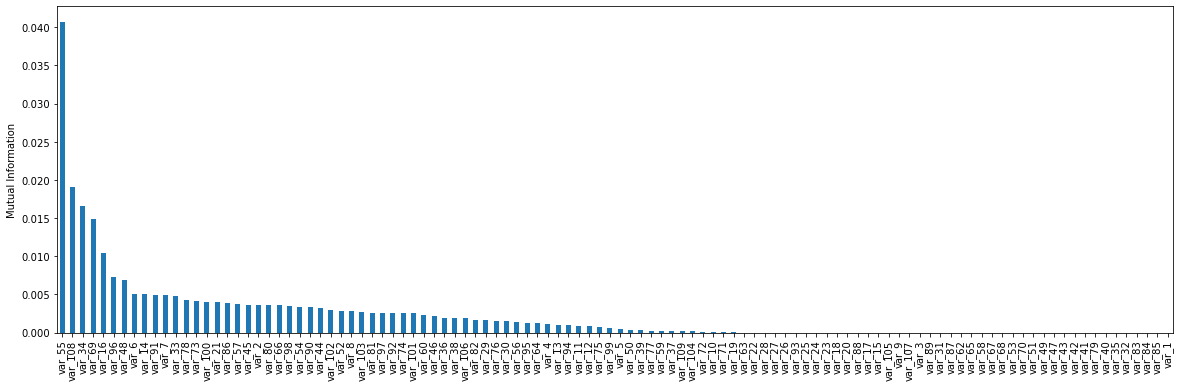

In [44]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a **few features (left of the plot) with higher mutual information values**. There are also features with **almost zero MI values on the right of the plot**. There are a few ways in which feature selection can be done:

**1. Select top k features based on MI**

In [45]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]    # top 10 selected!

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

**Remove the rest of the features!**

In [46]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

## Regression

**Load dataset**

In [47]:
%pwd

'C:\\Users\\husey\\FS_Codes'

In [116]:
data = pd.read_excel('HousingPrices.xls')
data.shape
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


First **pre-process** data, encode all the categorical variables into **numbers**, then **assess how deterministic** they are of the target!

In [117]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape  # We took only numeric variables for simplicity!

(2919, 38)

In [118]:
data.dropna(inplace=True)

**Separate train and test sets!**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((784, 37), (337, 37))

**Fill missing values !**

In [120]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Determine Mutual Information

**Determine the mutual information and make a bar  plot!**

Text(0, 0.5, 'Mutual Information')

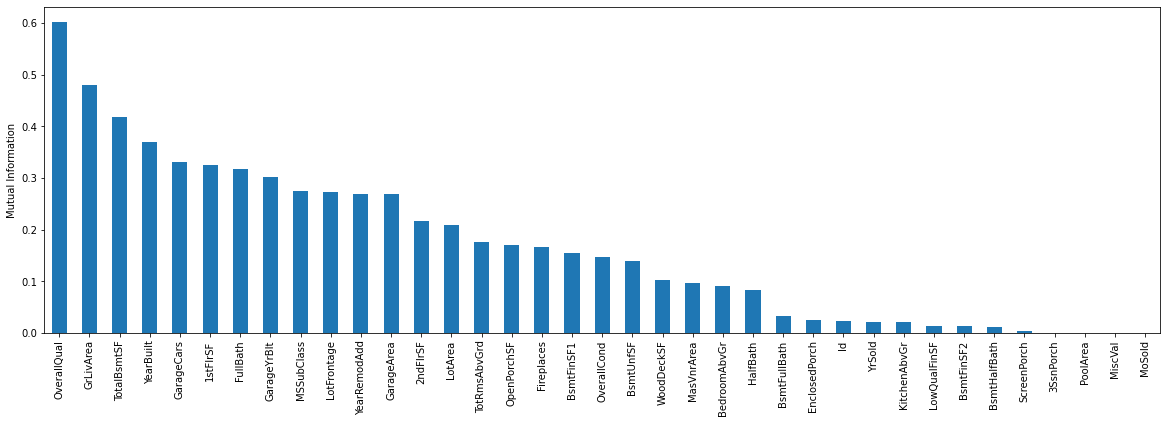

In [121]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

**Select top 10th percentile features and display the features**

In [122]:
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea'], dtype='object')

**Remove the rest of the features:**

In [123]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train

array([[   6., 1958., 1080., 1080.],
       [   5., 1975.,  969.,  969.],
       [   5., 1950.,  864.,  864.],
       ...,
       [   6., 1964., 1251., 1251.],
       [   4., 1954.,  941., 1470.],
       [   5., 2005., 1090., 1090.]])

**Mutual information** in not used very much! Sometimes, there may be some value in this method.